In [1]:
import pandas as pd
import math as m
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Visualization of Variation Data

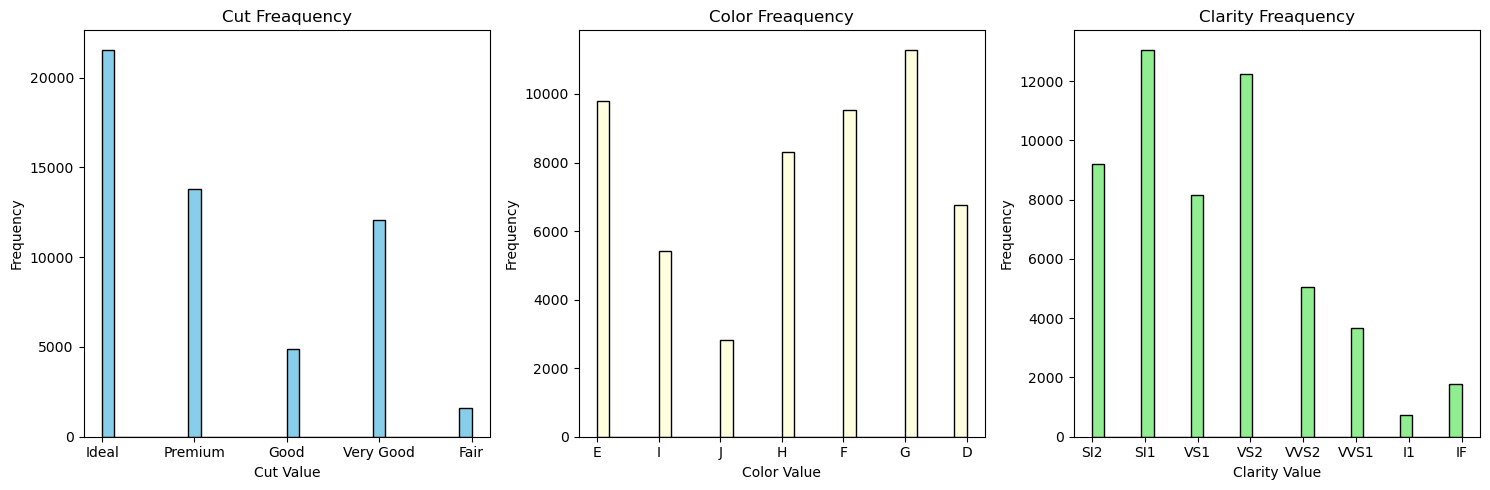

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df["cut"], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Cut Freaquency')
axs[0].set_xlabel('Cut Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(df["color"], bins=30, color='lightyellow', edgecolor='black')
axs[1].set_title('Color Freaquency')
axs[1].set_xlabel('Color Value')
axs[1].set_ylabel('Frequency')

axs[2].hist(df["clarity"], bins=30, color='lightgreen', edgecolor='black')
axs[2].set_title('Clarity Freaquency')
axs[2].set_xlabel('Clarity Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

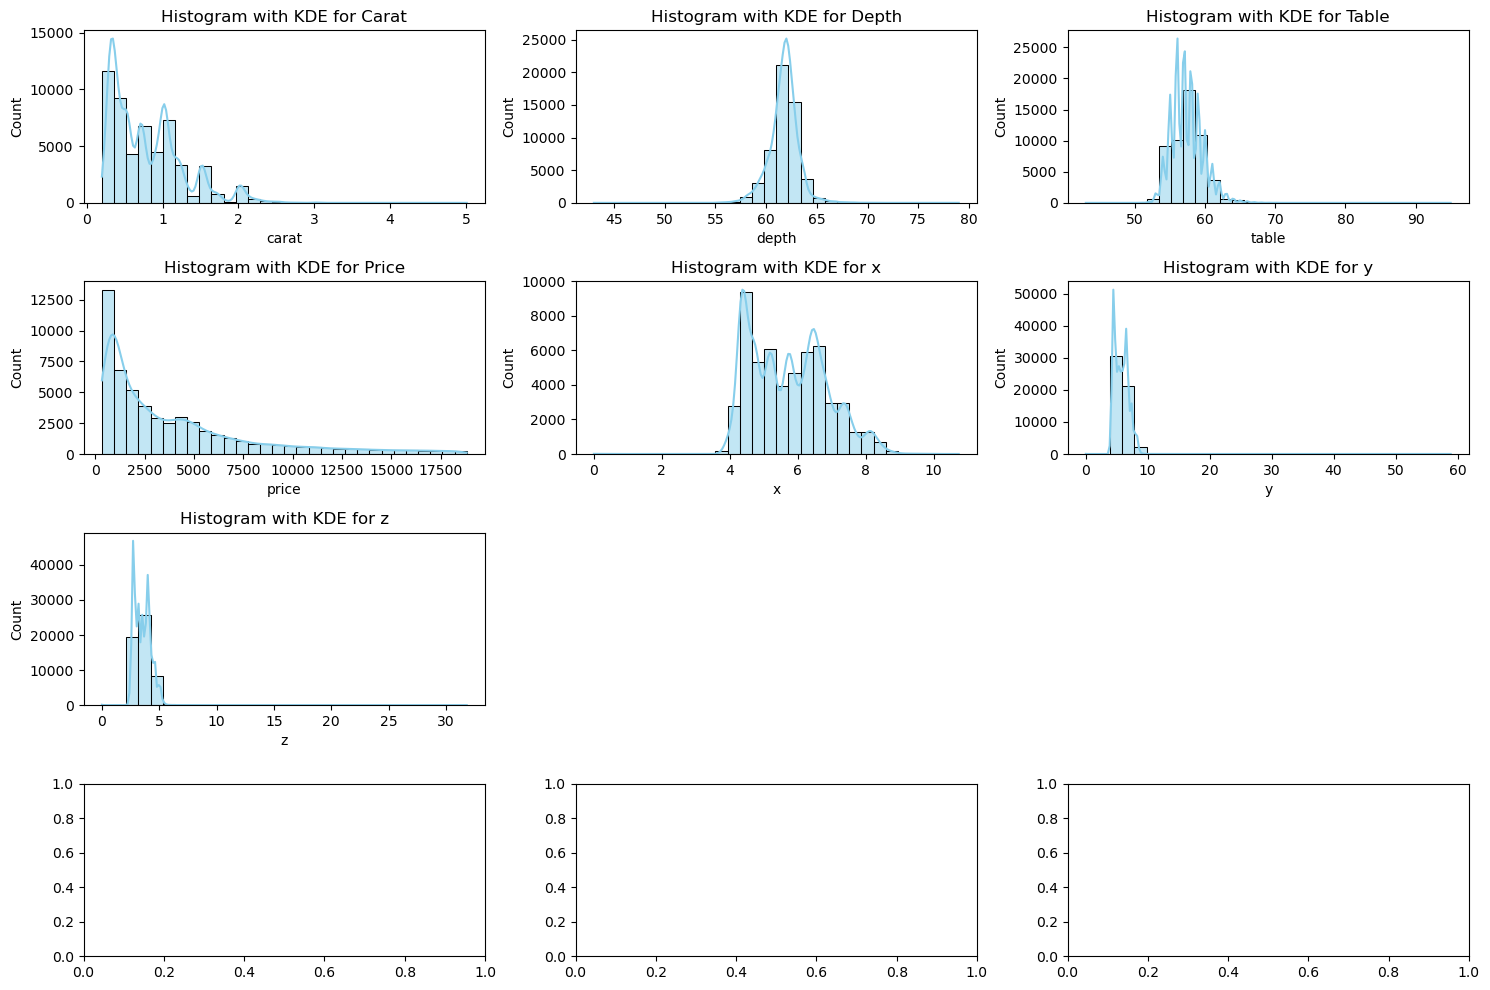

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

sns.histplot(df["carat"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title(f'Histogram with KDE for Carat')

sns.histplot(df["depth"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title(f'Histogram with KDE for Depth')

sns.histplot(df["table"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title(f'Histogram with KDE for Table')

sns.histplot(df["price"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title(f'Histogram with KDE for Price')

sns.histplot(df["x"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title(f'Histogram with KDE for x')

sns.histplot(df["y"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_title(f'Histogram with KDE for y')

sns.histplot(df["z"], kde=True, bins=30, color='skyblue', edgecolor='black', ax=axes[2, 0])
axes[2, 0].set_title(f'Histogram with KDE for z')

for i in range(2, 3):
    for j in range(1, 3):
        axes[i, j].axis('off')
        
plt.tight_layout()
plt.show()


#### Visualization of Covariation Data

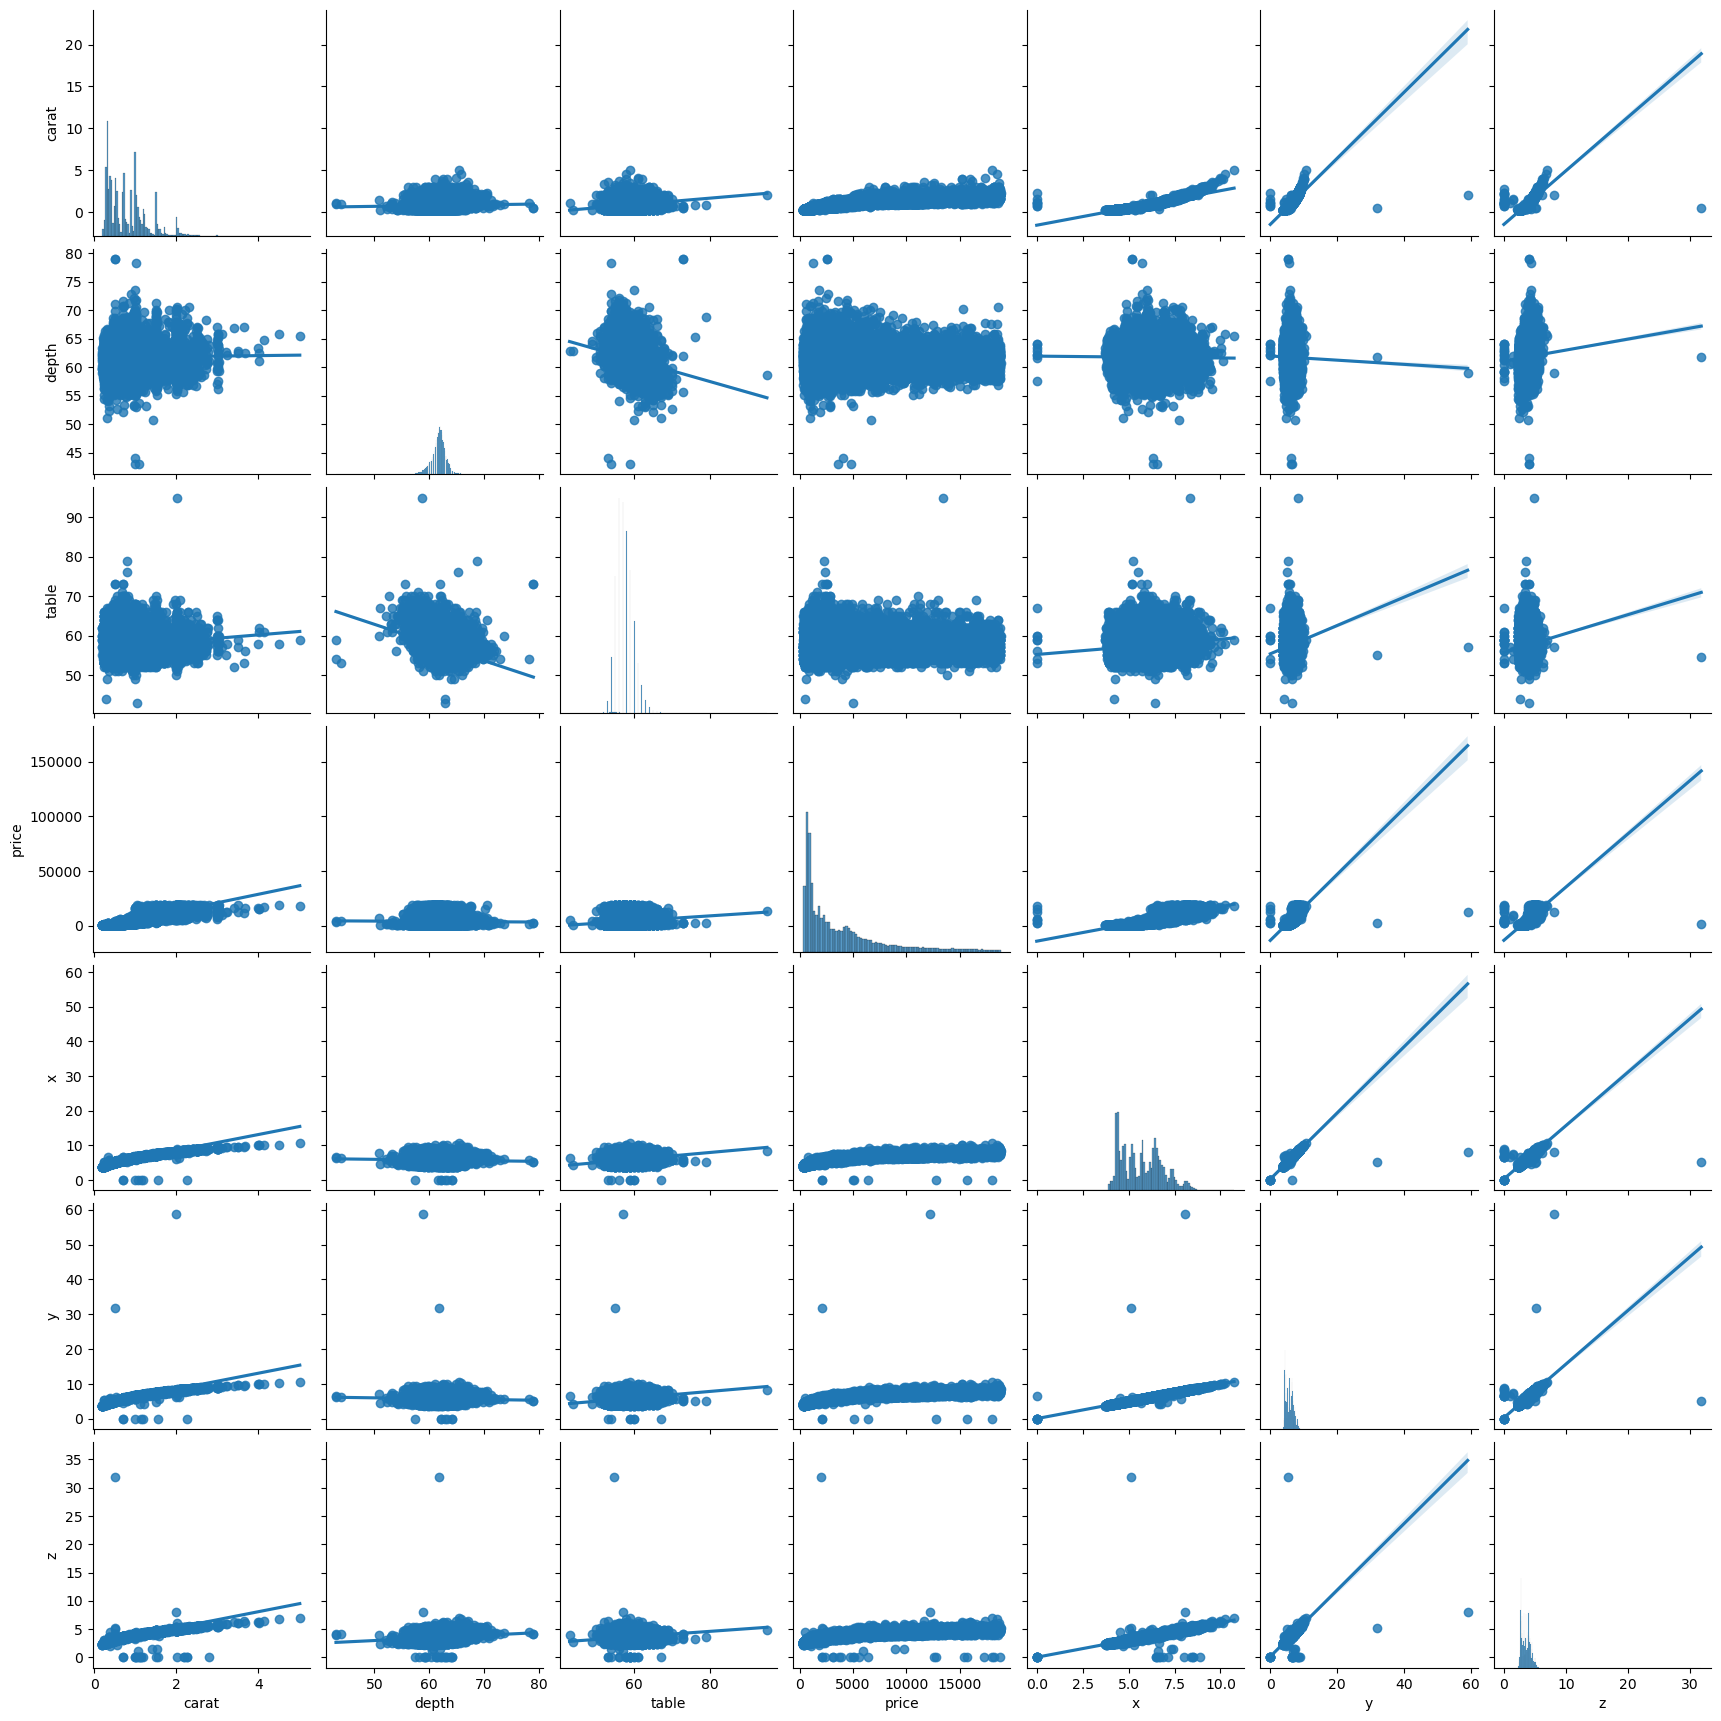

In [23]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df,kind='reg');

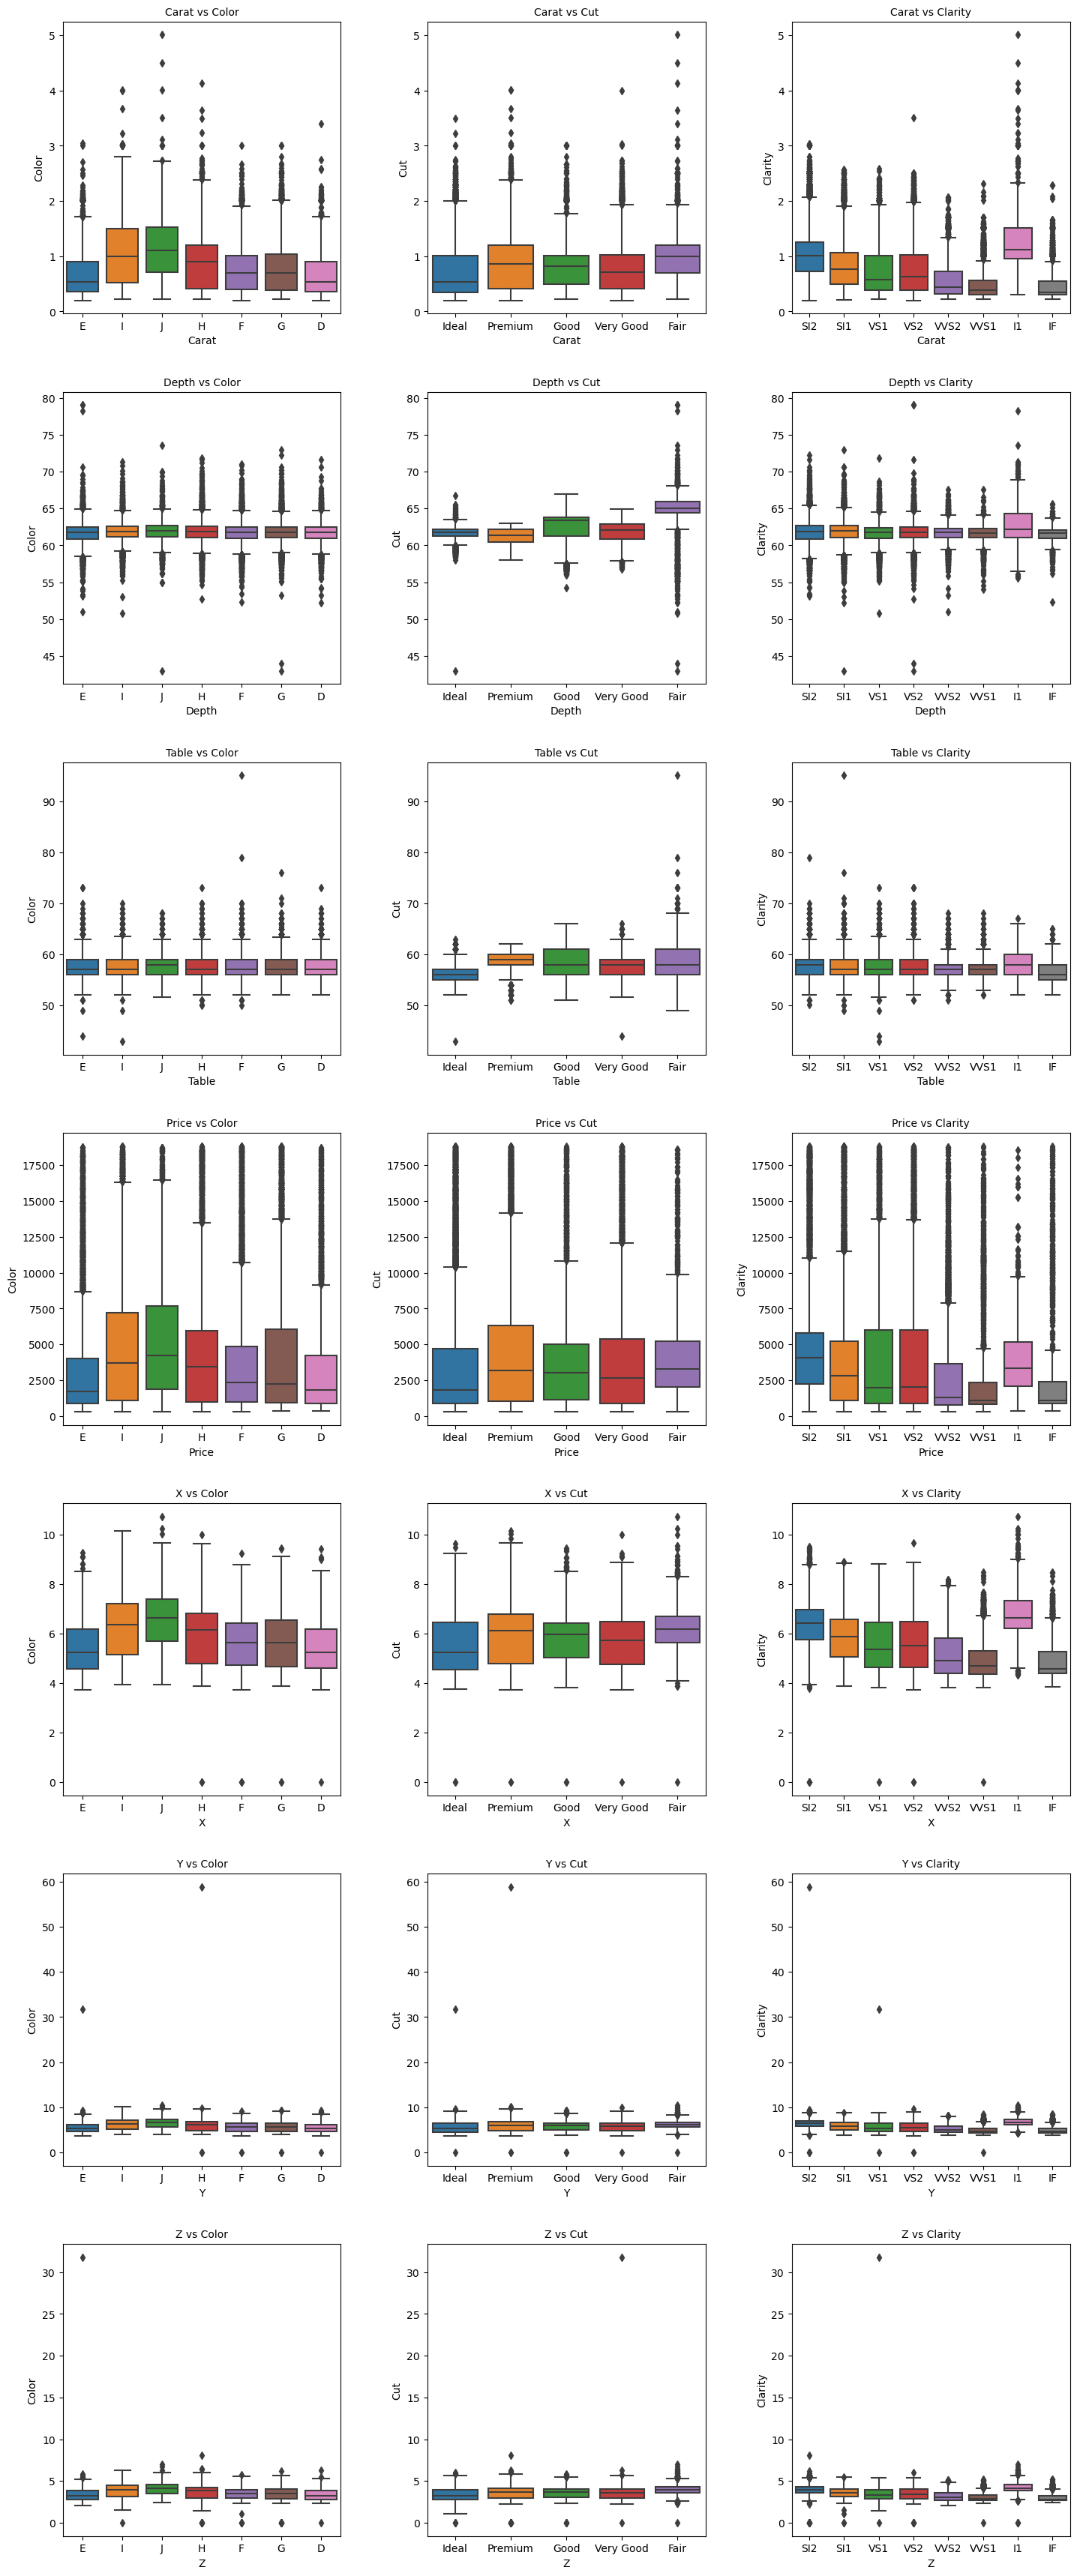

In [41]:
categoricalVar = ["color","cut","clarity"]
continousVar = ["carat", "depth", "table", "price", "x", "y", "z"]
fig, axes = plt.subplots(7, 3, figsize=(15, 35))
for i, var1 in enumerate(continousVar):
    for j, var2 in enumerate(categoricalVar):
        sns.boxplot(x=df[var2], y=df[var1], ax=axes[i, j])
        axes[i, j].set_title(f'{var1.title()} vs {var2.title()}', fontsize=10)
        axes[i, j].set_xlabel(var1.title())
        axes[i, j].set_ylabel(var2.title())

plt.tight_layout(pad=3)
plt.show()

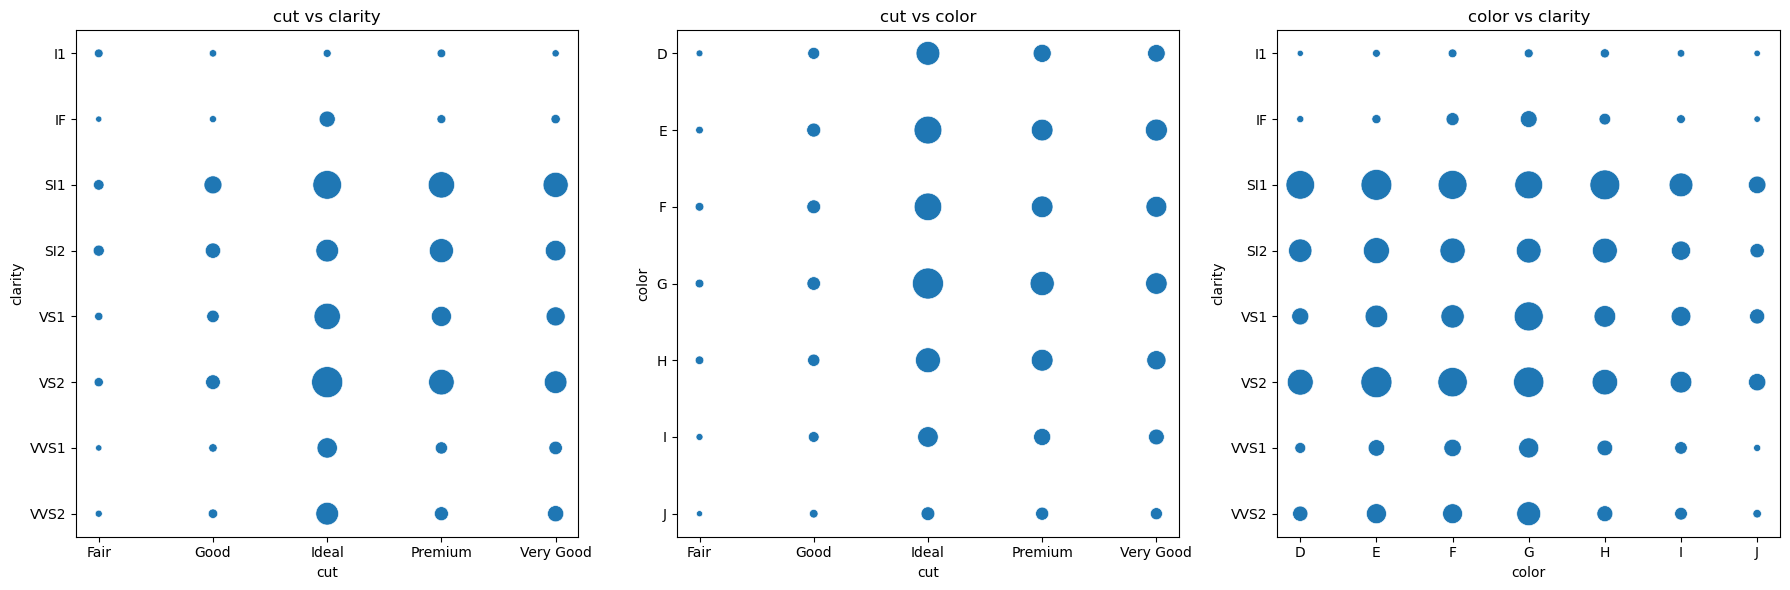

In [48]:
combination = [("cut","clarity"),("cut","color"),("color","clarity")]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax,(x_var,y_var) in zip(axes,combination):
    grouped = df.groupby([x_var, y_var]).size().reset_index(name='count')
    sns.scatterplot(
        data=grouped, 
        x=x_var, 
        y=y_var, 
        size='count',
        legend=False, 
        sizes=(20, 500),
        ax=ax
    )
    ax.set_title(f'{x_var} vs {y_var}')
plt.tight_layout()
plt.show()

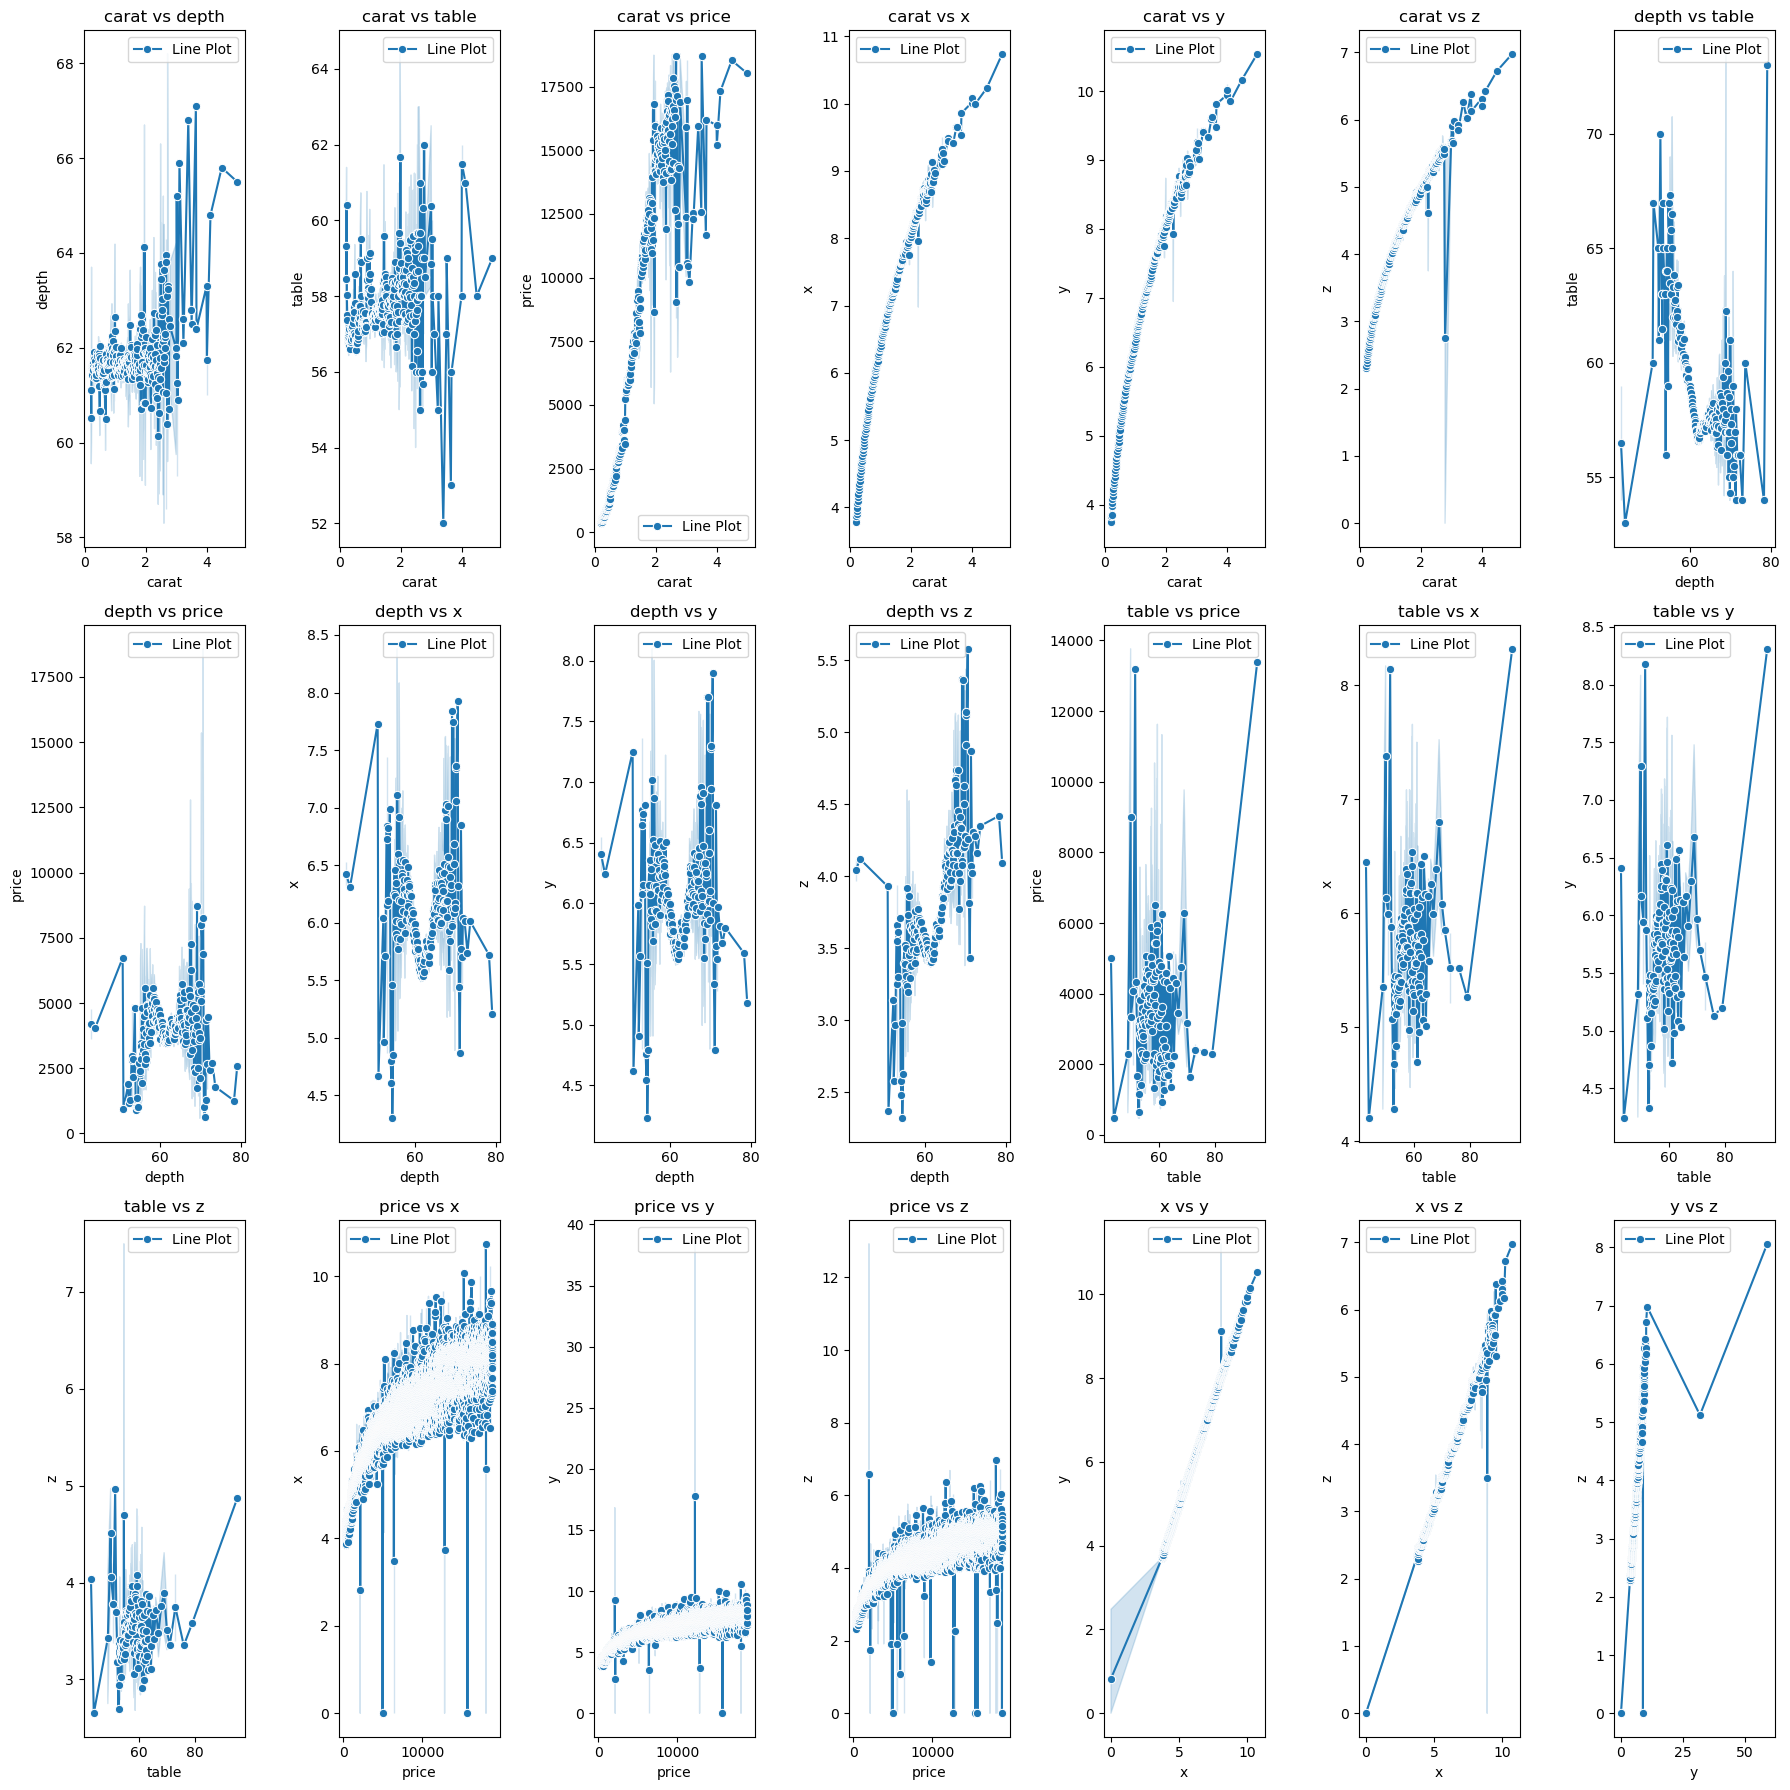

In [57]:
import itertools
combinations = list(itertools.combinations(["carat", "depth", "table", "price", "x", "y", "z"], 2))
fig, axes = plt.subplots(3, 7, figsize=(18, 18))
axes = axes.flatten()

for ax,(x_var,y_var) in zip(axes[:len(combinations)],combinations):
    sns.lineplot(x=x_var, y=y_var, data=df[["carat", "depth", "table", "price", "x", "y", "z"]], marker='o', label='Line Plot',ax=ax)
    ax.set_title(f'{x_var} vs {y_var}')
plt.tight_layout()
plt.show()

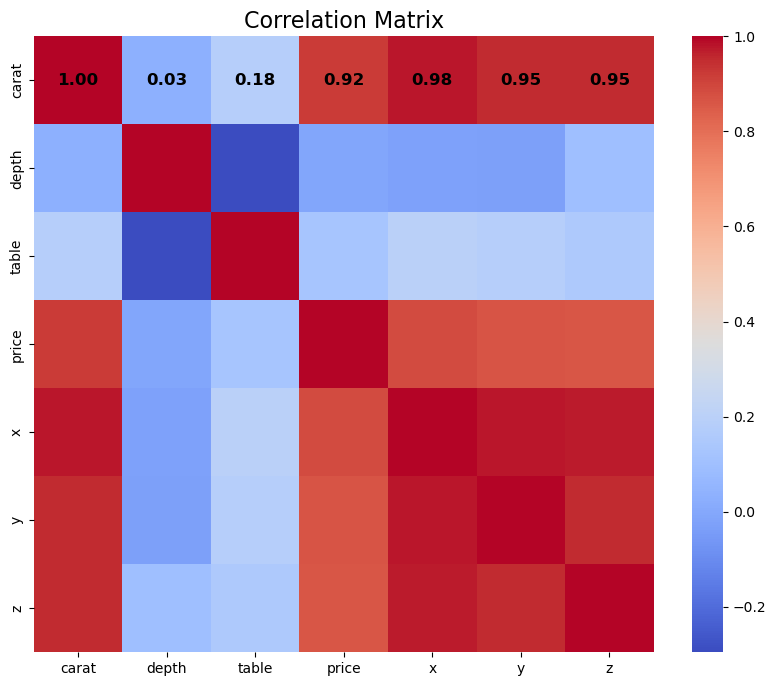

In [58]:
correlation_matrix = df[["carat", "depth", "table", "price", "x", "y", "z"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [59]:
correlation_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
